<a href="https://colab.research.google.com/github/AnupamaRajkumar/PyTorchTutorials/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [2]:
import torch
import numpy as np

In [3]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [4]:
def forward(x):
   y = w*x + b
   return y

In [5]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

Linear Regression

In [6]:
from torch.nn import Linear

In [7]:
#random initialisation 
torch.manual_seed(1)
#creating a linear model
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [8]:
x = torch.tensor(([2.0], [3.3]))
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [9]:
input = torch.randn(128, 20)
m = Linear(20, 30)
output = m(input)
print(output)
print(output.size())
print(m.weight.size())
print(m.bias.shape)

tensor([[ 0.7338,  0.1468, -0.3396,  ..., -0.1721,  0.9817,  0.5043],
        [ 0.3692, -0.4219,  0.0092,  ...,  0.3918,  0.3201,  0.7491],
        [-0.6178,  1.1036, -0.1939,  ...,  0.2874,  0.1888,  0.3217],
        ...,
        [ 0.0972,  0.2240, -0.9096,  ...,  0.8566,  0.2864, -0.6303],
        [-0.5258,  1.1659,  0.4289,  ...,  0.3938, -1.4387, -0.0125],
        [-0.4303,  0.0483,  0.1522,  ...,  0.1868, -0.5421, -0.6896]],
       grad_fn=<AddmmBackward>)
torch.Size([128, 30])
torch.Size([30, 20])
torch.Size([30])


In [10]:
print(m.bias)

Parameter containing:
tensor([ 0.1750,  0.1143, -0.0731, -0.1391,  0.2202,  0.0242, -0.1928, -0.0791,
         0.0154, -0.0214, -0.0865,  0.0663, -0.1518,  0.0936, -0.1509,  0.1803,
         0.1794,  0.2216, -0.2192, -0.0820, -0.0448, -0.2065,  0.1005, -0.0907,
        -0.0041,  0.1070, -0.1747,  0.0308, -0.0980,  0.1569],
       requires_grad=True)


The above implemented Linear model is same as the performing the following operations

In [11]:
mul1 = input @ m.weight.T
print(mul1.shape)

output = mul1 + m.bias
print(output.shape)
print(output)

torch.Size([128, 30])
torch.Size([128, 30])
tensor([[ 0.7338,  0.1468, -0.3396,  ..., -0.1721,  0.9817,  0.5043],
        [ 0.3692, -0.4219,  0.0092,  ...,  0.3918,  0.3201,  0.7491],
        [-0.6178,  1.1036, -0.1939,  ...,  0.2874,  0.1888,  0.3217],
        ...,
        [ 0.0972,  0.2240, -0.9096,  ...,  0.8566,  0.2864, -0.6303],
        [-0.5258,  1.1659,  0.4289,  ...,  0.3938, -1.4387, -0.0125],
        [-0.4303,  0.0483,  0.1522,  ...,  0.1868, -0.5421, -0.6896]],
       grad_fn=<AddBackward0>)


Adding 2 matrices of different dimensions

In [12]:
m1 = np.array([[1,2],[3,4]])
print(m1.shape)
print(m1)
m2 = np.array([5,6])
print(m2)
print(m2.shape)
m3 = m1 + m2
m3

(2, 2)
[[1 2]
 [3 4]]
[5 6]
(2,)


array([[ 6,  8],
       [ 8, 10]])

Creating Custom Modules

In [13]:
import torch.nn as nn
import matplotlib.pyplot as plt

Creating dataset

Text(0.5, 0, 'X')

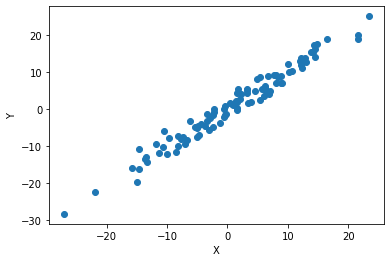

In [14]:
X = torch.randn(100, 1)*10 #to setup a larger range of the values
Y = X + 2*torch.randn(100, 1)  #adding noise
plt.plot(X.numpy(), Y.numpy(), 'o')
plt.ylabel('Y')
plt.xlabel('X')

In [15]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred

In [16]:
torch.manual_seed(1)
model = LinearRegression(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [17]:
x = torch.tensor([1.0])
model.forward(x)

tensor([0.0739], grad_fn=<AddBackward0>)

In [18]:
x = torch.tensor([[1.0], [2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

In [19]:
[w, b] = model.parameters()
#accessing the w and b tensors in w1 and b1
#item() gives us python values from both tensor values
def get_params():
  return(w[0][0].item(), b[0].item())

In [20]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, Y)
  plt.show()

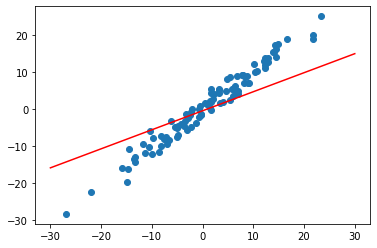

In [21]:
plot_fit('Initial Model')

Loss Function and Gradient Descent

In [22]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [23]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  #calculate loss - MSE
  loss = criterion(y_pred, Y)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss)
  #set gradients to zero - since gradients accumulate
  optimizer.zero_grad()
  #minimise the loss - take gradient of loss function using backward method
  loss.backward()
  #update model parameters using the optimiser initialised earlier
  optimizer.step()

epoch: 0 loss: 28.232168197631836
epoch: 1 loss: 22.020462036132812
epoch: 2 loss: 17.36411476135254
epoch: 3 loss: 13.873305320739746
epoch: 4 loss: 11.25589370727539
epoch: 5 loss: 9.293011665344238
epoch: 6 loss: 7.820633411407471
epoch: 7 loss: 6.715854644775391
epoch: 8 loss: 5.886577606201172
epoch: 9 loss: 5.263797760009766
epoch: 10 loss: 4.795797824859619
epoch: 11 loss: 4.443833827972412
epoch: 12 loss: 4.178863048553467
epoch: 13 loss: 3.979127883911133
epoch: 14 loss: 3.8283212184906006
epoch: 15 loss: 3.714221477508545
epoch: 16 loss: 3.627669095993042
epoch: 17 loss: 3.5617990493774414
epoch: 18 loss: 3.511465549468994
epoch: 19 loss: 3.4728140830993652
epoch: 20 loss: 3.44295072555542
epoch: 21 loss: 3.4197089672088623
epoch: 22 loss: 3.401461124420166
epoch: 23 loss: 3.386988639831543
epoch: 24 loss: 3.375375270843506
epoch: 25 loss: 3.3659353256225586
epoch: 26 loss: 3.3581528663635254
epoch: 27 loss: 3.35163950920105
epoch: 28 loss: 3.3461034297943115
epoch: 29 loss: 

Text(0.5, 0, 'epoch')

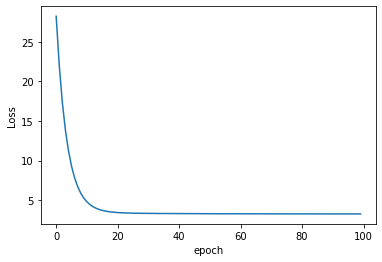

In [24]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

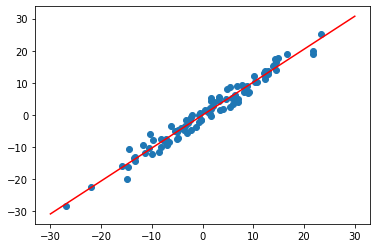

In [25]:
plot_fit('Trained Model')